In [13]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [14]:
import yaml
import numpy as np
import pandas as pd
import lhapdf as lh
import matplotlib.pyplot as plt
import MatplotlibSettings
from collections import deque
import copy
import os
from os import listdir
pd.set_option("display.max_rows", None, "display.max_columns", None)
from scipy import interpolate

import diff_dijet # importing the diff_dijet module from diff_dijet paper results at Q2=10,100

In [15]:
# Fit folder
FitFolder = "."

In [16]:
particle_type = "pr"
particle_symbol = {"ka":"K","pi":"pi","pr":"Pr"}[particle_type]
is_pions = (particle_type == "pi")

In [17]:
# Read and report chi2's
with open(FitFolder + "/Chi2s.yaml", "r") as chi2file:
    for chi2 in yaml.load(chi2file, Loader = yaml.CLoader):
        for c in chi2.items(): 
            print(c[0],"(Npt = ",c[1]["Npt"],"): chi2 = ", c[1]["chi2"])

H1LRG_12_MS (Npt =  167 ): chi2 =  0.957571090198719
H1LRG_11_225_MS (Npt =  13 ): chi2 =  0.5762392365809175
H1LRG_11_252_MS (Npt =  12 ): chi2 =  1.182959787209126
H1LRG_11_319_MS (Npt =  12 ): chi2 =  1.1500935289314715
h1zeus-combined (Npt =  128 ): chi2 =  1.1356228243625046
Total (Npt =  332 ): chi2 =  1.0207366965852822


In [18]:
#Plot settings
exp_dict = {
   
  'H1LRG12': {'plotfile': 'H1LRG_12_MS_'+particle_type,
  'active': True,
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
  'binints': True,
  'xlog': True,
  'xlims': [0.1, 0.99],
  'ylims1': [0, 0.5],
  'ylims2': [0.5, 1.5]},
    
  'H1LRG11_225': {'plotfile': 'H1LRG_11_225_'+particle_type,
  'active': True,
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
  'binints': True,
  'xlog': True,
  'xlims': [0.1, 0.99],
  'ylims1': [0, 0.5],
  'ylims2': [0.5, 1.5]},
    
  'H1LRG11_252': {'plotfile': 'H1LRG_11_252_'+particle_type,
  'active': True,
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
  'binints': True,
  'xlog': True,
  'xlims': [0.1, 0.99],
  'ylims1': [0, 0.5],
  'ylims2': [0.5, 1.5]},
    
  'H1LRG11_319': {'plotfile': 'H1LRG_11_319_'+particle_type,
  'active': True,
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
  'binints': True,
  'xlog': True,
  'xlims': [0.1, 0.99],
  'ylims1': [0, 0.5],
  'ylims2': [0.5, 1.5]},
    
  'H1ZEUS-combined': {'plotfile': 'H1_ZEUS Combined_'+particle_type,
  'active': True,
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
  'binints': True,
  'xlog': True,
  'xlims': [0.1, 0.99],
  'ylims1': [0, 0.5],
  'ylims2': [0.5, 1.5]}
}

def trait_dict_from_exp_dict(trait):
    return {exp:exp_dict[exp][trait] for exp in exp_dict if exp_dict[exp]["active"]}

plotfile = trait_dict_from_exp_dict("plotfile")
ylabels = trait_dict_from_exp_dict("ylabels")
binints = trait_dict_from_exp_dict("binints")
xlog = trait_dict_from_exp_dict("xlog")
xlims = trait_dict_from_exp_dict("xlims")
ylims1 = trait_dict_from_exp_dict("ylims1")
ylims2 = trait_dict_from_exp_dict("ylims2")

#Create plots folder
if not os.path.exists(FitFolder + "/plots"):
    os.makedirs(FitFolder + "/plots")

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_38453/1417220823.py:6: SyntaxWarning: invalid escape sequence '\s'
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
/tmp/ipykernel_38453/1417220823.py:15: SyntaxWarning: invalid escape sequence '\s'
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
/tmp/ipykernel_38453/1417220823.py:24: SyntaxWarning: invalid escape sequence '\s'
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
/tmp/ipykernel_38453/1417220823.py:33: SyntaxWarning: invalid escape s

In [21]:
# Upload sets and declare uncertainty type
lh.pathsAppend(str(FitFolder))

if particle_type == "pr":
    ffs = [lh.mkPDFs("LHAPDFSet_003")]#, lh.mkPDFs("SKMHS23_NLO_dijet")]
    unc = ["montecarlo", "hessian", "hessian", "montecarlo"]
    colff = ["green", "red", "green", "orange"]
    nameff = [r"\textbf{NN NLO Fit}", r"\textbf{SKMHS22-tw2-NLO}", r"\textbf{JAM19}"]
    
elif particle_type == "ka":
    ffs = [lh.mkPDFs("LHAPDFSet"), lh.mkPDFs("DSS17_NLO_Kaonp"),
           lh.mkPDFs("NNFF10_KAp_nlo"), lh.mkPDFs("NNFF10_KAp_nnlo")]
    unc = ["montecarlo"]*4
    colff = ["red", "blue", "green", "orange"]
    nameff = [r"\textbf{MAP FF1.0}", r"\textbf{DSS17}", r"\textbf{NNFF10 NLO}", r"\textbf{NNFF10 NNLO}"]

else:
    ffs = [lh.mkPDFs("LHAPDFSet")]
    unc = ["montecarlo"]
    colff = ["red"]
    nameff = [r"\textbf{MAP FF1.0}"]


# Function that returns the central values
def ComputeCentralValueAndUncertainty(x, Q, comb):
    centralvalue = []
    uncertainty  = []
    for s in zip(ffs, unc):
        if s[1] == "hessian":
            # In the case of a hessian set, use replica 0 as central value
            cv = 0
            f = s[0][0].xfxQ(x, Q)
            for k, v in comb.items():
                cv += v * f[k]
            err = 0
            for im in range(int((len(s[0]) - 1)/2)):
                fp = s[0][2*im+1].xfxQ(x, Q)
                fm = s[0][2*im+2].xfxQ(x, Q)
                t = 0
                for k, v in comb.items():
                    t += v * fp[k]
                    t -= v * fm[k]
                err += t**2
            centralvalue.append(cv)
            uncertainty.append(np.sqrt(err)/2)            
        elif s[1] == "montecarlo":
            # In case of a MC set, compute the average and standard deviation (do not include replica 0)
            cv  = 0
            cv2 = 0
            for irep in range(1, len(s[0])):
                f = s[0][irep].xfxQ(x, Q)
                t = 0
                for k, v in comb.items():
                    t += v * f[k]
                cv  += t / ( len(s[0]) - 1 )
                cv2 += t**2 / ( len(s[0]) - 1 )
            centralvalue.append(cv)
            uncertainty.append(np.sqrt(cv2 - cv**2))
        else:
            sys.exit("Unknown error: ", s[1])
    return centralvalue, uncertainty

LHAPDF 6.5.5 loading all 96 PDFs in set LHAPDFSet_003
LHAPDFSet_003, version 1; 96 PDF members


In [22]:
# FF plot settings

# Scale
Q = np.sqrt(10.0)

# Grid in x
xv = np.logspace(-3, -0.0001, 1000)

# Combinations to be plotted
combs = [{21: 1}, {1:1/6, 2:1/6, 3:1/6, -1:1/6 , -2:1/6, -3:1/6}]
labels = [r"$\beta \mathcal{F}_g(\beta,Q)$", r"$\beta \mathcal{F}_q(\beta,Q)$"]
ylim1 = [[0,150], [0,10]]
pdfname = ["g", "sigma"]

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_38453/1824545967.py:11: SyntaxWarning: invalid escape sequence '\s'
  zeus = pd.read_csv(zeusfile, sep='\s+', comment='#', header=None)


gluon


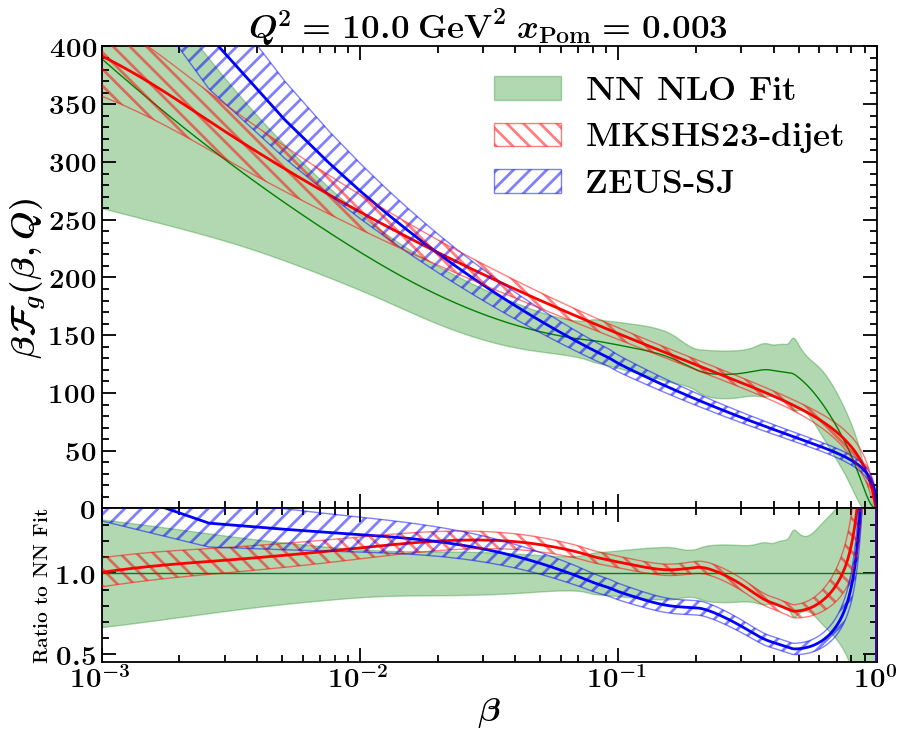

Sigma


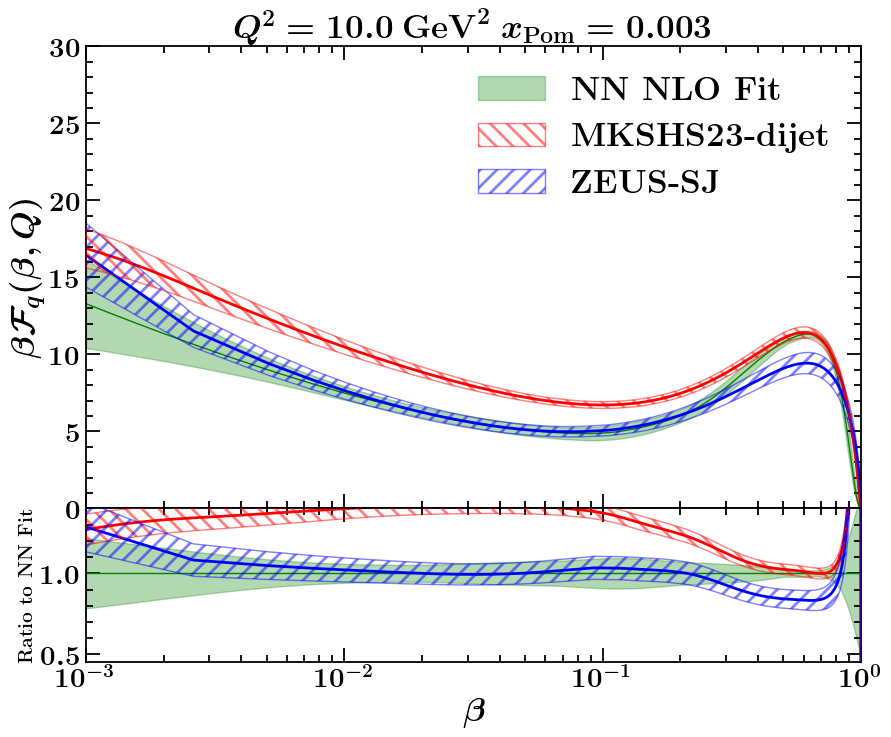

In [23]:
comparision= './comparision-other-group/'

# Plot FFs
xPom=0.003
for cm in zip(combs, labels, ylim1, pdfname):
    # comparision=
    # print( comparision + cm[3] + "_xPom_"+ str(xPom) + '.dat')
    filename  = comparision + cm[3] + "_xPom_"+ str(xPom) + '.dat'
    zeusfile  = comparision + "zeusD_SJ_xPom_"+ str(xPom) + "_Q2_" + str(int(Q*Q)) + '.dat'
    filename_gkg18 = comparision + "GKG18_Q2_10/" + cm[3] + "_xPom_"+ str(xPom) + '.dat'
    zeus = pd.read_csv(zeusfile, sep='\s+', comment='#', header=None)
    xzeus = zeus[0].to_numpy()
    if cm[-1]=="g":
        print("gluon")
        yzeus    = zeus[1].to_numpy()/xPom
        yminzeus = np.array(zeus[1].to_numpy()-zeus[5].to_numpy())/xPom
        ymaxzeus = np.array(zeus[1].to_numpy()+zeus[5].to_numpy())/xPom
    else:
        print("Sigma")
        yzeus    = (zeus[2].to_numpy())/xPom# + zeus[3].to_numpy() + zeus[4].to_numpy()
        yminzeus = yzeus/xPom - 6.0*(zeus[6].to_numpy())/xPom
        ymaxzeus = yzeus/xPom + 6.0*(zeus[6].to_numpy())/xPom
        yminzeus =  (np.array(zeus[2].to_numpy()-zeus[6].to_numpy()))/xPom
        ymaxzeus = (np.array(zeus[2].to_numpy()+zeus[6].to_numpy()))/xPom
    ############# diff_dijet #############
    
    xhk19    = diff_dijet.xv_S[str(int(Q*Q))]
    yhk19    = diff_dijet.yv_S[str(int(Q*Q))]/6.0
    yminkh19 = diff_dijet.ymin_S[str(int(Q*Q))]/6.0
    ymaxhk19 = diff_dijet.ymax_S[str(int(Q*Q))]/6.0
    if cm[3] == "g":
        xhk19    = diff_dijet.xv_g[str(int(Q*Q))]
        yhk19    = diff_dijet.yv_g[str(int(Q*Q))]
        yminkh19 = diff_dijet.ymin_g[str(int(Q*Q))]
        ymaxhk19 = diff_dijet.ymax_g[str(int(Q*Q))]

    fv  = []
    dfv = []
    for x in xv:
        cv, err = ComputeCentralValueAndUncertainty(x, Q, cm[0])
        fv.append(cv)
        dfv.append(err)
        # hasan.append(err)
    # Transpose results
    fv  = list(map(list, zip(*fv)))
    dfv = list(map(list, zip(*dfv)))

    # Setup plot
    f, (ax1, ax2) = plt.subplots(2, 1, sharex = "all",\
                                 gridspec_kw = dict(width_ratios = [1], height_ratios = [3, 1]),figsize=(10,8))
    plt.subplots_adjust(wspace = 0, hspace = 0)
    
    ax1.set_title(r"$Q^2 = " + str(round(Q**2,1)) + r"\ \textbf{GeV}^2\ x_{\mathrm{Pom}}="+ str(xPom) +r"$")
    ax1.set_ylabel(cm[1])
    ax1.set_xlim([0.001, 1])
    ax1.set_xscale("log")
    ax1.set_ylim([0,30])
    if cm[3]=="g":
        ax1.set_ylim([0,400])#cm[2])
    
    ax2.set_xlabel(r"$\beta$")
    ax2.set_ylabel(r"\textbf{Ratio to " + "NN Fit" + "}", fontsize = 14)
    ax2.set_xlim([0.001, 1])
    ax2.set_xscale("log")
    ax2.set_ylim([0.45, 1.4])

    for iset in range(len(fv)):
        # if iset == 1 : # this is LHAPDFSet
        # fv[0]  = xPom**(-1.21)*(1 + 88.7 * xPom**1.75 ) *np.array(fv[0])
        # dfv[0] = xPom**(-1.21)*(1 + 88.7 * xPom**1.75 ) *np.array(dfv[0])
#         print(10*np.array(fv[iset]))
#         fv[1] =  np.array(fv[1])
        ax1.plot(xv, fv[iset], color = colff[iset], ls = "-", lw = 1)
        ax1.fill_between(xv,(np.array(fv[iset]) + np.array(dfv[iset])),\
                         (np.array(fv[iset]) - np.array(dfv[iset])),\
                         color = colff[iset], alpha = 0.3, label = nameff[iset])
        ax1.plot(xv, xv - xv, color = "black", ls = "--", lw = 1)
        ax2.plot(xv, np.array(fv[iset])/np.array(fv[0]), color = colff[iset], ls = "-", lw = 1)
        ax2.fill_between(xv, (np.array(fv[iset])+np.array(dfv[iset]))/np.array(fv[0]),\
                         (np.array(fv[iset])-np.array(dfv[iset]))/np.array(fv[0]),\
                         color = colff[iset], alpha = 0.3)
        ############# diff_dijet #############
        color= 'r'
        markerth=''
        hatch='\\\\'
        alpha=1
        bandcolor="none"
        edgecolor='r'
        plt.rcParams['hatch.linewidth'] = 2.0  # previous pdf hatch linewidth
        thlinestyle,linewidth='-',2.0
        ax1.plot(xhk19, yhk19, color = color, lw = linewidth, marker=markerth)
        ax1.fill_between(xhk19, ymaxhk19, yminkh19, color = bandcolor, \
                         alpha = 0.5,hatch=hatch ,edgecolor=edgecolor,zorder=11, label=r'\textbf{MKSHS23-dijet}')
        # Interpolate the first function to the x-values of the second function
        interp_func = interpolate.interp1d(xv, fv[iset], kind='linear', fill_value="extrapolate")
        y1_interp = interp_func(xhk19)
        ax2.plot(xhk19, yhk19/y1_interp, color = color, lw = linewidth, marker=markerth)
        ax2.fill_between(xhk19, ymaxhk19/y1_interp, yminkh19/y1_interp, color = bandcolor, \
                         alpha = 0.5,hatch=hatch ,edgecolor=edgecolor,zorder=10)
        ############# diff_dijet #############
        ############# ZEUS ##############
        color= 'b'
        markerth=''
        hatch='//'
        alpha=0.5
        bandcolor="none"
        edgecolor= color
        plt.rcParams['hatch.linewidth'] = 2.0  # previous pdf hatch linewidth
        thlinestyle,linewidth='-',2.0
        ax1.plot(xzeus, yzeus, color = color, lw = linewidth, marker=markerth)
        ax1.fill_between(xzeus, ymaxzeus, yminzeus, color = bandcolor, \
                         alpha = alpha,hatch=hatch ,edgecolor=edgecolor,zorder=10, label=r'\textbf{ZEUS-SJ}')
        # Interpolate the first function to the x-values of the second function
        interp_func = interpolate.interp1d(xv, fv[iset], kind='linear', fill_value="extrapolate")
        y1_interp = interp_func(xzeus)
        ax2.plot(xzeus, yzeus/y1_interp, color = color, lw = linewidth, marker=markerth)
        ax2.fill_between(xzeus, ymaxzeus/y1_interp, yminzeus/y1_interp, color = bandcolor, \
                         alpha = alpha,hatch=hatch ,edgecolor=edgecolor,zorder=10)
        ############# ZEUS ##############
    ax1.legend()

    plt.savefig(FitFolder + "/plots/" + cm[3] + "_xPom_"+ str(xPom) + ".jpeg")
    plt.show()
    plt.close()